<a href="https://colab.research.google.com/github/Israel-San-Agustin/METODOS-NUMERICOS-/blob/main/Polinomio_interpolante_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Definir la función f(x) para el ejemplo (se puede cambiar según sea necesario)
def f(x):
    return x*3 - 2*x*2 + 7*x - 5

In [19]:
# Valores de x y F(x) de la tabla de datos
x_vals = np.array([0, 1, 2, 3, 4, 5])
F_vals = np.array([-5, 1, 9, 25, 55, 105])


In [20]:
# Cálculo de la tabla de diferencias divididas
def calcular_diferencias_divididas(x_vals, F_vals):
    n = len(x_vals)
    tabla_diff = np.zeros((n, n))
    tabla_diff[:, 0] = F_vals

    # Llenar la tabla de diferencias divididas
    for col in range(1, n):
        for row in range(n - col):
            tabla_diff[row, col] = (tabla_diff[row + 1, col - 1] - tabla_diff[row, col - 1]) / (x_vals[row + col] - x_vals[row])

    return tabla_diff

In [21]:
# Evaluación del polinomio de Newton en un valor específico de x
def evaluar_polinomio_newton(x_objetivo, x_vals, tabla_diff):
    n = len(x_vals)
    valor_pol = tabla_diff[0, 0]
    producto = 1
    for i in range(1, n):
        producto *= (x_objetivo - x_vals[i - 1])
        valor_pol += tabla_diff[0, i] * producto
    return valor_pol

In [22]:
# Generar la tabla de diferencias divididas
tabla_dif = calcular_diferencias_divididas(x_vals, F_vals)

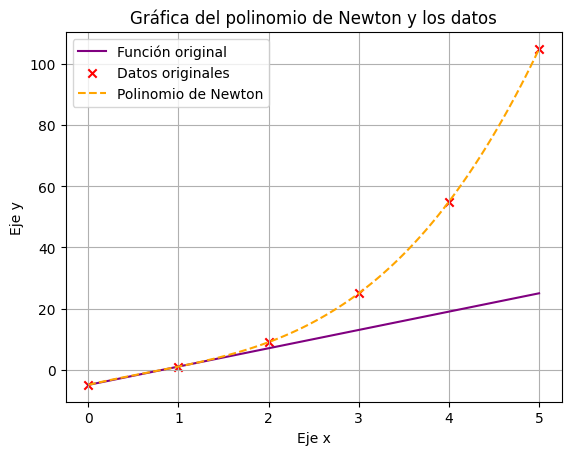

El valor del polinomio de Newton en x = 2.5 es: 15.625


In [34]:
# Graficar la función original y los puntos de la tabla
x_rango = np.linspace(0, 5, 100)
plt.plot(x_rango, f(x_rango), label='Función original', color='purple')
plt.scatter(x_vals, F_vals, color="red", marker='x', label='Datos originales')
plt.title("Gráfica del polinomio de Newton y los datos")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(True)

# Graficar el polinomio de Newton sobre el rango de x
y_newton_vals = np.array([evaluar_polinomio_newton(xi, x_vals, tabla_dif) for xi in x_rango])
plt.plot(x_rango, y_newton_vals, label='Polinomio de Newton', color='orange', linestyle='--')

# Mostrar la leyenda y el gráfico
plt.legend()
plt.show()

# Evaluar el polinomio de Newton en un punto específico, como x=2.5
punto_x = 2.5
resultado_polinomio = evaluar_polinomio_newton(punto_x, x_vals, tabla_dif)
print(f"El valor del polinomio de Newton en x = {punto_x} es: {resultado_polinomio}")